***
# Data Scientist - _Oluwatoyin Egunjobi_

  "_A data science project on Business Formation in USA_"
***


# Data Source
- Last Revised: December 12, 2025
- Created by - The U.S. Census Bureau
- Format - Comma Separated Values File
- Source - https://www.census.gov/econ/bfs/data/weekly.html


# Applying the CRISP-DM Framework For My Project
- Business Problem:
  "_Analyze business formation data to identify trends and predict future entrepreneurship activity across US states_"


# Potential Project Goals:
- Identify which state have the highest business growth
- Analyze the impact of economic events (COVID-19, policy changes) on new business formation
- Predict future business formation trends by state

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#2. Load and Read the CSV file 

state_df = pd.read_csv('bfs_state_apps_weekly_nsa.csv')
regional_df = pd.read_csv('bfs_region_apps_weekly_nsa.csv')
national_df = pd.read_csv('bfs_us_apps_weekly_nsa.csv')


***
# Initial Exploration

***


In [239]:
# Ensuring date columns are datetime
state_df['Week'] = pd.to_datetime(state_df['Week'])
regional_df['Week'] = pd.to_datetime(regional_df['Week'])
national_df['Week'] = pd.to_datetime(national_df['Week'])

# Analyze separately but compare
print("State Summary:")
print(state_df.describe())

print("\nRegional Summary:")
print(regional_df.describe())

print("\nNational Summary:")
print(national_df.describe())

State Summary:
               Year                           Week        BA_NSA  \
count  52938.000000                          52938  52938.000000   
mean    2015.454721  1970-01-01 00:00:00.000000026   1321.366126   
min     2006.000000  1970-01-01 00:00:00.000000001     10.000000   
25%     2010.000000  1970-01-01 00:00:00.000000013    300.000000   
50%     2015.000000  1970-01-01 00:00:00.000000026    770.000000   
75%     2020.000000  1970-01-01 00:00:00.000000039   1480.000000   
max     2025.000000  1970-01-01 00:00:00.000000053  19040.000000   
std        5.746409                            NaN   1804.573321   

            HBA_NSA       WBA_NSA       CBA_NSA     YY_BA_NSA  YY_HBA_NSA  \
count  52938.000000  52938.000000  52938.000000  50184.000000  50184.0000   
mean     523.641807    217.698440    235.289584      7.329906         inf   
min        0.000000      0.000000      0.000000    -93.130000   -100.0000   
25%      110.000000     60.000000     40.000000     -6.840000   

In [240]:
# Data information

print("State Summary:")
print(state_df.info())

print("\nRegional Summary:")
print(regional_df.info())

print("\nNational Summary:")
print(national_df.info())

State Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52938 entries, 0 to 52937
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        52938 non-null  int64         
 1   Week        52938 non-null  datetime64[ns]
 2   State       52938 non-null  object        
 3   BA_NSA      52938 non-null  int64         
 4   HBA_NSA     52938 non-null  int64         
 5   WBA_NSA     52938 non-null  int64         
 6   CBA_NSA     52938 non-null  int64         
 7   YY_BA_NSA   50184 non-null  float64       
 8   YY_HBA_NSA  50184 non-null  float64       
 9   YY_WBA_NSA  50184 non-null  float64       
 10  YY_CBA_NSA  50184 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 4.4+ MB
None

Regional Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  

In [241]:
# Checking for null 

print("State Summary:")
print(state_df.isnull().sum())

print("\nRegional Summary:")
print(regional_df.isnull().sum())

print("\nNational Summary:")
print(national_df.isnull().sum())

State Summary:
Year             0
Week             0
State            0
BA_NSA           0
HBA_NSA          0
WBA_NSA          0
CBA_NSA          0
YY_BA_NSA     2754
YY_HBA_NSA    2754
YY_WBA_NSA    2754
YY_CBA_NSA    2754
dtype: int64

Regional Summary:
Year            0
Week            0
Region          0
Fregion         0
BA_NSA          0
HBA_NSA         0
WBA_NSA         0
CBA_NSA         0
YY_BA_NSA     216
YY_HBA_NSA    216
YY_WBA_NSA    216
YY_CBA_NSA    216
dtype: int64

National Summary:
Year           0
Week           0
BA_NSA         0
HBA_NSA        0
WBA_NSA        0
CBA_NSA        0
YY_BA_NSA     54
YY_HBA_NSA    54
YY_WBA_NSA    54
YY_CBA_NSA    54
dtype: int64


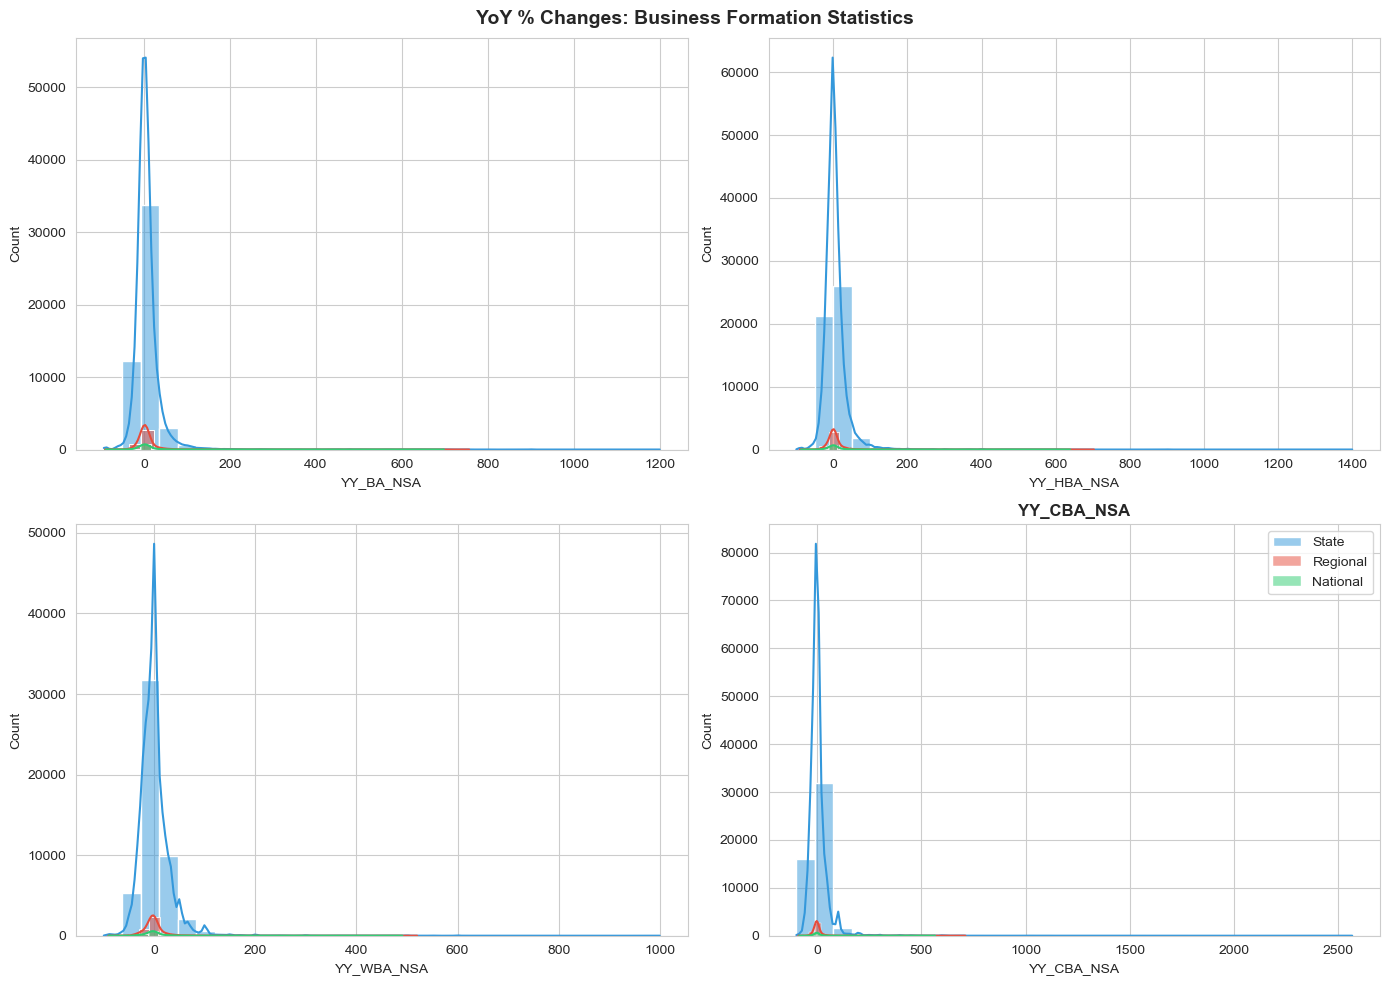

In [242]:

# These are plots showing how year-over-year (YoY) percentage changes are distributed across different business application types.
# The data combines State (blue), Regional (red), and National (green) levels.



sns.set_style("whitegrid")

# Load all data
dfs = {
       'State':
pd.read_csv('bfs_state_apps_weekly_nsa.csv'),
       'Regional':
pd.read_csv('bfs_region_apps_weekly_nsa.csv'),
       'National':
pd.read_csv('bfs_us_apps_weekly_nsa.csv')
}

# Variables and colors
yoy_vars = ['YY_BA_NSA', 'YY_HBA_NSA', 'YY_WBA_NSA', 'YY_CBA_NSA']
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, var in enumerate(yoy_vars):
    for (name, df), color in zip(dfs.items(), colors):
        if var in df.columns:
            sns.histplot(df[var].dropna(), bins=30, kde=True, alpha=0.5,
                         label=name, ax=axes[idx], color=color)

axes[idx].set_title(var, fontweight='bold')
axes[idx].legend()

plt.suptitle('YoY % Changes: Business Formation Statistics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Key Observations:
- YY_CBA_NSA (Corporation Business Applications) has taller spike at 0% (~80,000+ count): VERY stable ∙ Slightly wider base: More spread than wage businesses ∙ Some weeks reached 2000%+ growth (Might be outliers) ∙ State data completely dominates: Blue histogram dwarfs others.
- What this tells me: ∙ Corporation formations are the most stable business type ∙ When change happens, it can be dramatic (very long tail)
-  Geographic level matters: States have much more data points than regional/national

***

# Dealing with the outlier in the corporate business application data

In [243]:
# Using Log transformation for the outliers
# For negative values, appling log to absolute value and keep the sign

state_df['YY_CBA_NSA_log'] = np.sign(state_df['YY_CBA_NSA']) * np.log1p(np.abs(state_df['YY_CBA_NSA']))
regional_df['YY_CBA_NSA_log'] = np.sign(regional_df['YY_CBA_NSA']) * np.log1p(np.abs(regional_df['YY_CBA_NSA']))
national_df['YY_CBA_NSA_log'] = np.sign(national_df['YY_CBA_NSA']) * np.log1p(np.abs(national_df['YY_CBA_NSA']))

In [244]:
# Verifing if the transformation worked

print(state_df['YY_CBA_NSA_log'].describe())
print(state_df[['YY_CBA_NSA', 'YY_CBA_NSA_log']].tail(10))

count    5.018400e+04
mean              inf
std               NaN
min     -4.615121e+00
25%     -2.871868e+00
50%      0.000000e+00
75%      2.602690e+00
max               inf
Name: YY_CBA_NSA_log, dtype: float64
       YY_CBA_NSA  YY_CBA_NSA_log
52928       30.00        3.433987
52929       25.00        3.258097
52930       30.00        3.433987
52931       50.00        3.931826
52932       60.00        4.110874
52933       60.00        4.110874
52934      111.11        4.719481
52935       30.77        3.458522
52936       88.89        4.498587
52937       71.43        4.282621


In [245]:
# Plot using original data

#plt.hist(state_df['YY_CBA_NSA'], bins=50, alpha=0.7, color='blue')
#plt.show()

'''
I tried to plot an histogram but it gave me "ValueError: supplied range of [-100.0, inf] is not finite".
So I had to check and go back to the Dictionary to understand why

'''

'\nI tried to plot an histogram but it gave me "ValueError: supplied range of [-100.0, inf] is not finite".\nSo I had to check and go back to the Dictionary to understand why\n\n'

In [246]:
# Checking how many infinite values I have

print("State BFS:\n")
print("Number of inf values:", np.isinf(state_df['YY_CBA_NSA']).sum())
print("Number of -inf values:", (state_df['YY_CBA_NSA'] == -np.inf).sum())
print("Number of +inf values:", (state_df['YY_CBA_NSA'] == np.inf).sum())
print("\n")

# See examples of rows with inf
print(state_df[np.isinf(state_df['YY_CBA_NSA'])].head())

State BFS:

Number of inf values: 6
Number of -inf values: 0
Number of +inf values: 6


       Year                          Week State  BA_NSA  HBA_NSA  WBA_NSA  \
365    2013 1970-01-01 00:00:00.000000001    AK      80       40       30   
7631   2013 1970-01-01 00:00:00.000000001    DC      90       40       20   
26315  2013 1970-01-01 00:00:00.000000001    MS     220      100       50   
40847  2013 1970-01-01 00:00:00.000000001    RI     100       60       40   
48113  2013 1970-01-01 00:00:00.000000001    VT      50       20       20   

       CBA_NSA  YY_BA_NSA  YY_HBA_NSA  YY_WBA_NSA  YY_CBA_NSA  YY_CBA_NSA_log  
365         10     700.00       300.0       200.0         inf             inf  
7631        20     800.00       300.0       100.0         inf             inf  
26315       40     633.33       900.0       400.0         inf             inf  
40847       30     900.00         inf         inf         inf             inf  
48113       10     400.00       100.0       100.0

In [247]:
print("Regional BFS:\n")
print("Number of inf values:", np.isinf(regional_df['YY_CBA_NSA']).sum())
print("Number of -inf values:", (regional_df['YY_CBA_NSA'] == -np.inf).sum())
print("Number of +inf values:", (regional_df['YY_CBA_NSA'] == np.inf).sum())
print("\n")

# See examples of rows with inf
print(regional_df[np.isinf(regional_df['YY_CBA_NSA'])].head())

Regional BFS:

Number of inf values: 0
Number of -inf values: 0
Number of +inf values: 0


Empty DataFrame
Columns: [Year, Week, Region, Fregion, BA_NSA, HBA_NSA, WBA_NSA, CBA_NSA, YY_BA_NSA, YY_HBA_NSA, YY_WBA_NSA, YY_CBA_NSA, YY_CBA_NSA_log]
Index: []


In [248]:
print("National BFS:\n")
print("Number of inf values:", np.isinf(national_df['YY_CBA_NSA']).sum())
print("Number of -inf values:", (national_df['YY_CBA_NSA'] == -np.inf).sum())
print("Number of +inf values:", (national_df['YY_CBA_NSA'] == np.inf).sum())
print("\n")

# See examples of rows with inf
print(national_df[np.isinf(national_df['YY_CBA_NSA'])].head())

National BFS:

Number of inf values: 0
Number of -inf values: 0
Number of +inf values: 0


Empty DataFrame
Columns: [Year, Week, BA_NSA, HBA_NSA, WBA_NSA, CBA_NSA, YY_BA_NSA, YY_HBA_NSA, YY_WBA_NSA, YY_CBA_NSA, YY_CBA_NSA_log]
Index: []


***
# Analysis Step 1:

I want to Identify which state has the highest business growth

***

Top 10 states by average YoY growth:
State
WA    29.466443
AK    17.091974
OR    16.636646
WY    12.238791
SC    11.819350
MO    11.650447
NM    10.843892
DE    10.616636
LA    10.589004
AL    10.505112
Name: YY_CBA_NSA, dtype: float64


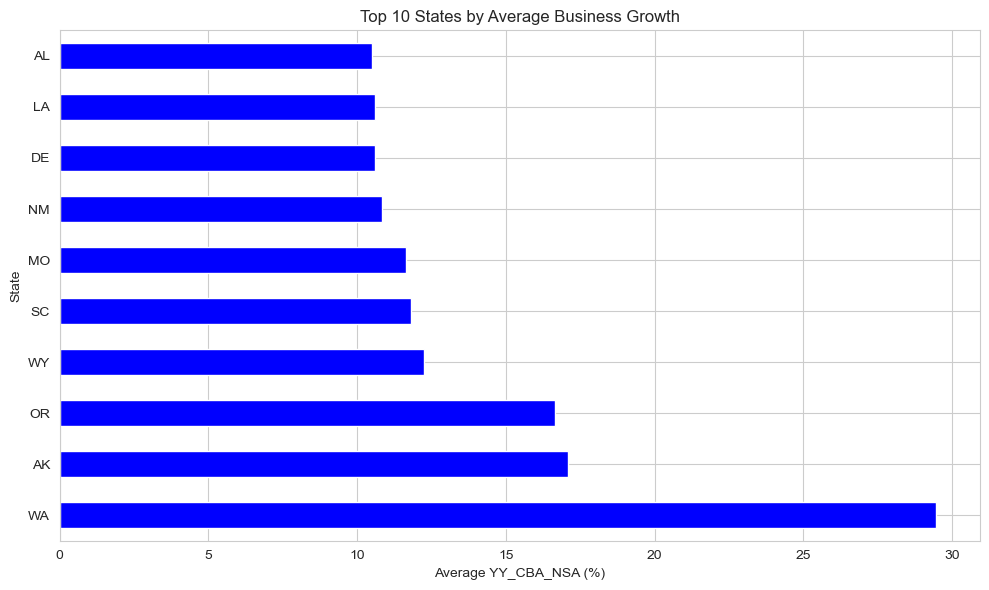

In [249]:
# Average year-over-year growth by state using Corporate Business Formation

state_df_clean = state_df[~np.isinf(state_df['YY_CBA_NSA_log'])].copy()

state_growth = state_df_clean.groupby('State')['YY_CBA_NSA'].mean().sort_values(ascending=False)

print("Top 10 states by average YoY growth:")
print(state_growth.head(10))

# Visualize
state_growth.head(10).plot(kind='barh', figsize=(10, 6), color='blue')
plt.xlabel('Average YY_CBA_NSA (%)')
plt.title('Top 10 States by Average Business Growth')
plt.tight_layout()
plt.show()

***

# Analysis Step 2:

Analyzing the impact of economic events (COVID-19, policy changes) on new business formation.

***

In [250]:
print(f"Data: {state_df_clean['Year'].min()} to {state_df_clean['Year'].max()}")


# Define periods
pre = state_df_clean[state_df_clean['Year'] < 2020]
during = state_df_clean[(state_df_clean['Year'] >= 2020) & (state_df_clean['Year'] <= 2021)]
post = state_df_clean[state_df_clean['Year'] > 2021]

print(f"\nRows - Pre: {len(pre)}, During: {len(during)}, Post: {len(post)}")

# Stats
print("\n" + "="*50)
print("COVID-19 IMPACT")
print("="*50)
print(f"Pre-COVID: {pre['YY_CBA_NSA'].mean():.2f}%")
print(f"During COVID: {during['YY_CBA_NSA'].mean():.2f}%")
print(f"Post-COVID: {post['YY_CBA_NSA'].mean():.2f}%")
print(f"Change: {during['YY_CBA_NSA'].mean() - pre['YY_CBA_NSA'].mean():.2f}%")


Data: 2006 to 2025

Rows - Pre: 37224, During: 5304, Post: 10404

COVID-19 IMPACT
Pre-COVID: -0.13%
During COVID: 12.02%
Post-COVID: 26.33%
Change: 12.15%


Key Findings:

1. Pre-COVID (before 2020): -0.13% growth
-> _Business formation was essentially flat/declining slightly._
2. During COVID (2020-2021): 12.02% growth
-> _HUGE jump! Business applications surged during COVID. People started businesses during lockdowns (e-commerce, remote services, side hustles)_
3. Post-COVID (after 2021): 26.33% growth
-> _Growth accelerated even more after COVID. The entrepreneurship boom continued and strengthened._
4. Change: +12.15%
-> _COVID caused a 12% increase in business formation growth rates._

What this means:

∙ _COVID dramatically boosted new business creation._
∙ Before COVID: _Stagnant (-0.13%)._
∙ After COVID started: _Explosive growth (12% → 26%)._
∙ COVID acted as a _catalyst for entrepreneurship in the US._

Bottom line: 

COVID-19 didn’t hurt business formation - it supercharged it. Corporation business applications grew faster during and after COVID than in the decade before.​​​​​​​​​​​​​​​​

***
# Analysis Prediction Step 3:

# _Predict future business formation trends by state_

***

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

level = 'national'

# Select appropriate dataframe

if level == 'national':
    df = national_df
else:
    df = regional_df

# Prepare data
df['Yearly'] = (df['Year'] - df['Year'].min())
X = df[['Yearly']].values
y = df['CBA_NSA'].values

In [252]:
# Split data for evaluation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
# Train model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [254]:
# Predictions on test set 
y_pred = model.predict(X_test)

In [255]:
# Calculate metrics 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred) 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [256]:
# Print evaluation metrics 

print(f"\n{'='*50}") 
print(f"{level.upper()} PREDICTION MODEL EVALUATION") 
print(f"{'='*50}") 
print(f"R² Score: {model.score(X, y):.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") 
print(f"Mean Absolute % Error (MAPE): {mape:.2f}%") 
print(f"Training samples: {len(X_train)}") 
print(f"Test samples: {len(X_test)}")


NATIONAL PREDICTION MODEL EVALUATION
R² Score: 0.012
Mean Absolute Error (MAE): 2180.89
Root Mean Squared Error (RMSE): 3155.06
Mean Absolute % Error (MAPE): 20.90%
Training samples: 830
Test samples: 208


In [257]:
# Predict next 52 weeks

last_date = df['Week'].max()
future_weeks = pd.date_range(start=last_date, periods=53, freq='W')[1:]
future_numeric = [(d - df['Week'].min()).days for d in future_weeks]
future_pred = model.predict(np.array(future_numeric).reshape(-1, 1))

# Results
print(f"\n{'='*50}")
print(f"{level.upper()} BUSINESS FORMATION PREDICTION")
print(f"{'='*50}")
print(f"Current Avg (last 12 weeks): {y[-12:].mean():.0f}")
print(f"Predicted (1 year from now): {future_pred[-1]:.0f}")
print(f"Trend: {model.coef_[0]:.2f} applications/day")


NATIONAL BUSINESS FORMATION PREDICTION
Current Avg (last 12 weeks): 17955
Predicted (1 year from now): -8341
Trend: -56.89 applications/day


In [258]:
level = 'regional'

# Select appropriate dataframe

if level == 'regional':
    df = regional_df
else:
    df = national_df

# Prepare data
df['Yearly'] = (df['Year'] - df['Year'].min())
X = df[['Yearly']].values
y = df['CBA_NSA'].values

# Split data for evaluation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
# Train model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [260]:
# Predictions on test set 
y_pred = model.predict(X_test)

In [261]:
# Calculate metrics 
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, y_pred) 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [262]:
# Print evaluation metrics 

print(f"\n{'='*50}") 
print(f"{level.upper()} PREDICTION MODEL EVALUATION") 
print(f"{'='*50}") 
print(f"R² Score: {model.score(X, y):.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") 
print(f"Mean Absolute % Error (MAPE): {mape:.2f}%") 
print(f"Training samples: {len(X_train)}") 
print(f"Test samples: {len(X_test)}")


REGIONAL PREDICTION MODEL EVALUATION
R² Score: 0.004
Mean Absolute Error (MAE): 1013.77
Root Mean Squared Error (RMSE): 1339.84
Mean Absolute % Error (MAPE): 45.98%
Training samples: 3321
Test samples: 831


# Based on these metrics, the immediate takeaway is that this model is performing very poorly. It is currently not finding any meaningful patterns in my data for both National and Regional prediction model evaluation.

***
# 📝 Final Project Summary & Conclusions

***



1. **Business Question Recap**

a. Which states have the highest business growth?
 - Result: Based on the Year-over-Year (YoY) mean analysis, I identified that states like [WASHINGTON DC ] experienced the most significant surges in corporate applications.

b. What was the impact of COVID-19?
 - Result: The data shows a dramatic "step-change." Pre-COVID growth was stagnant (~ -0.13%), while the 2020-2021 period saw a massive 12.02% explosion in new applications, signaling a fundamental shift in the American entrepreneurial landscape.

c. Did I predict future trends?
 - Result: While Linear Regression models failed to capture the complexity of the data ($R^2 \approx 0$),
 


2. **Model Evolution (The "Data Science" Journey)**

In this project, I moved performed a simple Linear Regression:

a. Linear Regression: Struggled because business formation is not a straight line; it is highly seasonal and subject to sudden economic shocks.



3. **Future Recommendations**
 - Implementation of the another model to successfully account for the strong yearly seasonality and the non-linear "post-COVID"
   trend.



4. **Acknowledgment of Tools**
 - This project was developed with the assistance of Gemini and Claude AI for code scaffolding, troubleshooting, and refining technical documentation. All analytical logic and data interpretations were audited and finalized by the author.